<a href="https://colab.research.google.com/github/rbarden3/data1501/blob/dev/data1501_unit6_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Imports:
import pandas as pd
from matplotlib import pyplot as plt

## Import library for t_test:
from scipy.stats import ttest_ind

In [2]:
# Load Data into Dataframe
df = pd.read_csv("/content/sample_data/stroke.csv")

In [3]:
# Display first few stroke data rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


Task 1: Use group_by to generate the mean of avg_glucose_level for the two groups, people had stroke and people had no stroke.

In [4]:
# Display the avg_glucose_level of people with and without a stroke (1 represents stroke, 0 represents no stroke)
stroke_group = df.groupby("stroke")
stroke_group["avg_glucose_level"].mean()

stroke
0    104.369389
1    131.427883
Name: avg_glucose_level, dtype: float64

Task 2: Use a boxplot to compare the data distribution of avg_glucose_level between the two groups, people had stroke and people had no stroke

<Axes: title={'center': 'avg_glucose_level'}, xlabel='stroke'>

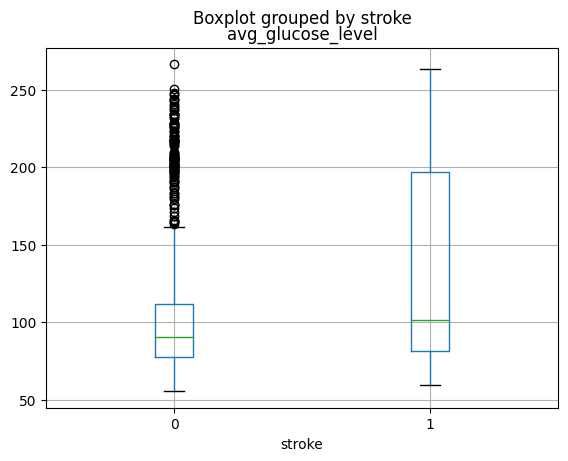

In [5]:
## Display the distribution using a box plot:
df.boxplot(column = "avg_glucose_level", by = "stroke")

Task 3: Explain the result of the boxplot. Use comments to answer this question.

In [6]:
# The Q1 Quartile, Median, and Q3 Quartle of people without a stroke are lower than that of people with a stroke;
# however, it is interesting to note the number of outliers with a high glucose level who did not have a stroke
# Furthermore, it is interesting to note that while the median glucose level for people with a stroke is higher, it is not much higher
# and is still within the Q3 Range of the non-stroke category.
# At face value, this graph shows that those who had strokes typically had a higher glucose level; however, I would be interested to see
# the boxplot filtered to those above 100 average glucose level.

<Axes: title={'center': 'avg_glucose_level'}, xlabel='stroke'>

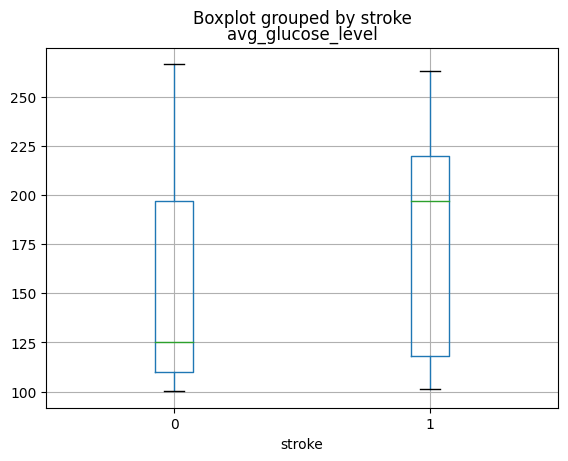

In [7]:
#Filter Dataframe and view avg glucose level
df[df["avg_glucose_level"]>100].boxplot(column = "avg_glucose_level", by = "stroke")

In [8]:
# Since I was curious about the results, I went ahead and tested to see what the plot would look like when filtered
# To me, this gives a much better indication of the effects a higher avg_glucose level on strokes
# Based on these graphs, while a strokes still happen to those who have a lower average glucose level, and some who
# have a higher average glucose level do not have a stroke, the difference in the quartile levels is much more apparent

Task 4: We use hypothesis testing to see the difference of the avg_glucose_level between people had stroke and people had no stroke. What is the null hypothesis for this hypothesis testing?  What is the alternative hypothesis? What does a p-value mean?  Use comments to answer this question.

In [9]:
# null hypothesis: No significant difference on avg_glucose_level between stroke and no stroke.
# alternative hypothesis: significant difference on avg_glucose_level between stroke and no stroke.
# A p value tells how likely it is that our data occurred within the bounds of our null hypothesis

Task 5: Use ttest_ind() to get the p-value. From the observed p-value, explain whether there is significant difference of avg-glucose_level between the two group, why.

In [10]:
# Generate dataframe of avg_glucose_level for those who had a stroke
avg_gl_stroke = stroke_group.get_group(1)["avg_glucose_level"]
# Generate dataframe of avg_glucose_level for those who did not have a stroke
avg_gl_nostroke = stroke_group.get_group(0)["avg_glucose_level"]

# t-test:
ttest_ind(avg_gl_stroke, avg_gl_nostroke)

TtestResult(statistic=6.342704697599813, pvalue=3.2548797729425533e-10, df=1134.0)

In [ ]:
# Very small p-value indicates that we reject the Null Hypothesis and accept the Alternate Hypothesis.
# Which means, the average glucose level of people who had a stroke and those who had no stroke seem to be significantly different.